In [1]:
# Importing the Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [8]:
# Importing the dataset
dftest = pd.read_csv('test.csv')
dftrain = pd.read_csv("train.csv") ## As the dataset is in excel format
df.head()
df_ori = pd.concat([dftrain, dftest], sort=False) # concatenate the train and test for generalizability
df = df_ori.copy()
df = df.iloc[:,8:24]
df = df.dropna() # checking missing data
df

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
25972,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
25973,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
25974,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


In [9]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(df)

(1100470.3455394665, 0.0)

In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print(kmo_model)

0.7347284682494839


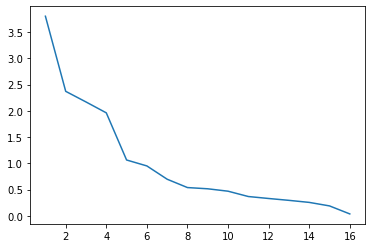

In [19]:
fa = FactorAnalyzer() 

# Fit the dataframe using Factor Analyzer
fa.fit(df)

# Identify the eigenvalues
ev, v = fa.get_eigenvalues() #eigenvalues

# display the eigenvalues
ev
plt.plot(range(1,df.shape[1]+1),ev)

In [12]:
fa = FactorAnalyzer(5, rotation='varimax')
fa.fit(df)
print(fa.loadings_)

[[ 9.51222539e-02  1.34785546e-01 -9.00112274e-03  6.14101710e-01
   4.65372153e-01]
 [-9.57623228e-03  5.54625877e-02 -2.96640173e-04  5.89526396e-01
  -6.49139445e-03]
 [-3.22972075e-02  3.10800908e-02 -2.35280268e-03  7.72955079e-01
   4.48606169e-01]
 [ 1.25845040e-02 -4.67148478e-02  4.77284149e-03  6.82653012e-01
  -1.11332163e-01]
 [ 7.70829829e-01  4.10135181e-03 -1.80185151e-02  3.06650438e-02
   3.46802832e-02]
 [ 2.89549138e-01  1.22384914e-01 -9.53511014e-03  1.08246330e-01
   7.54004520e-01]
 [ 7.56387766e-01  7.95257131e-02 -1.38440024e-02 -2.64576505e-02
   2.09396960e-01]
 [ 7.67525557e-01  4.66055426e-01 -7.83337123e-03  4.09450711e-02
   2.32560646e-02]
 [ 8.52709959e-02  7.01341668e-01 -1.92813552e-02  1.03362675e-02
   4.71336121e-02]
 [ 5.78302899e-02  4.86147654e-01  2.34399008e-02  4.31284269e-02
   9.26339950e-02]
 [ 3.64249932e-02  7.64505666e-01  6.93860743e-03  4.62035704e-02
  -3.50870359e-02]
 [ 1.13416171e-01  2.87751429e-01 -1.30508044e-02 -2.70974654e-02

In [13]:
lmatrix = pd.DataFrame(fa.loadings_, index = list(df.columns), columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'])
lmatrix #loading matrix

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Inflight wifi service,0.095122,0.134786,-0.009001,0.614102,0.465372
Departure/Arrival time convenient,-0.009576,0.055463,-0.000297,0.589526,-0.006491
Ease of Online booking,-0.032297,0.031080,-0.002353,0.772955,0.448606
Gate location,0.012585,-0.046715,0.004773,0.682653,-0.111332
Food and drink,0.770830,0.004101,-0.018019,0.030665,0.034680
Online boarding,0.289549,0.122385,-0.009535,0.108246,0.754005
Seat comfort,0.756388,0.079526,-0.013844,-0.026458,0.209397
Inflight entertainment,0.767526,0.466055,-0.007833,0.040945,0.023256
On-board service,0.085271,0.701342,-0.019281,0.010336,0.047134
Leg room service,0.057830,0.486148,0.023440,0.043128,0.092634


In [14]:
lmatrix.sort_values('Factor 1', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Cleanliness,0.854195,0.084949,0.000647,-0.001291,0.097845
Food and drink,0.770830,0.004101,-0.018019,0.030665,0.034680
Inflight entertainment,0.767526,0.466055,-0.007833,0.040945,0.023256
Seat comfort,0.756388,0.079526,-0.013844,-0.026458,0.209397
Online boarding,0.289549,0.122385,-0.009535,0.108246,0.754005
Checkin service,0.113416,0.287751,-0.013051,-0.027097,0.133295
Inflight wifi service,0.095122,0.134786,-0.009001,0.614102,0.465372
On-board service,0.085271,0.701342,-0.019281,0.010336,0.047134
Leg room service,0.057830,0.486148,0.023440,0.043128,0.092634
Baggage handling,0.036425,0.764506,0.006939,0.046204,-0.035087


In [15]:
lmatrix.sort_values('Factor 2', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Inflight service,0.035749,0.799371,-0.044377,0.046369,-0.058022
Baggage handling,0.036425,0.764506,0.006939,0.046204,-0.035087
On-board service,0.085271,0.701342,-0.019281,0.010336,0.047134
Leg room service,0.057830,0.486148,0.023440,0.043128,0.092634
Inflight entertainment,0.767526,0.466055,-0.007833,0.040945,0.023256
Checkin service,0.113416,0.287751,-0.013051,-0.027097,0.133295
Inflight wifi service,0.095122,0.134786,-0.009001,0.614102,0.465372
Online boarding,0.289549,0.122385,-0.009535,0.108246,0.754005
Cleanliness,0.854195,0.084949,0.000647,-0.001291,0.097845
Seat comfort,0.756388,0.079526,-0.013844,-0.026458,0.209397


In [16]:
lmatrix.sort_values('Factor 3', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Arrival Delay in Minutes,-0.017345,-0.019420,0.995885,-0.000800,-0.008277
Departure Delay in Minutes,-0.015680,-0.014231,0.968664,0.000091,-0.006186
Leg room service,0.057830,0.486148,0.023440,0.043128,0.092634
Baggage handling,0.036425,0.764506,0.006939,0.046204,-0.035087
Gate location,0.012585,-0.046715,0.004773,0.682653,-0.111332
Cleanliness,0.854195,0.084949,0.000647,-0.001291,0.097845
Departure/Arrival time convenient,-0.009576,0.055463,-0.000297,0.589526,-0.006491
Ease of Online booking,-0.032297,0.031080,-0.002353,0.772955,0.448606
Inflight entertainment,0.767526,0.466055,-0.007833,0.040945,0.023256
Inflight wifi service,0.095122,0.134786,-0.009001,0.614102,0.465372


In [17]:
lmatrix.sort_values('Factor 4', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Ease of Online booking,-0.032297,0.031080,-0.002353,0.772955,0.448606
Gate location,0.012585,-0.046715,0.004773,0.682653,-0.111332
Inflight wifi service,0.095122,0.134786,-0.009001,0.614102,0.465372
Departure/Arrival time convenient,-0.009576,0.055463,-0.000297,0.589526,-0.006491
Online boarding,0.289549,0.122385,-0.009535,0.108246,0.754005
Inflight service,0.035749,0.799371,-0.044377,0.046369,-0.058022
Baggage handling,0.036425,0.764506,0.006939,0.046204,-0.035087
Leg room service,0.057830,0.486148,0.023440,0.043128,0.092634
Inflight entertainment,0.767526,0.466055,-0.007833,0.040945,0.023256
Food and drink,0.770830,0.004101,-0.018019,0.030665,0.034680


In [18]:
lmatrix.sort_values('Factor 5', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Online boarding,0.289549,0.122385,-0.009535,0.108246,0.754005
Inflight wifi service,0.095122,0.134786,-0.009001,0.614102,0.465372
Ease of Online booking,-0.032297,0.031080,-0.002353,0.772955,0.448606
Seat comfort,0.756388,0.079526,-0.013844,-0.026458,0.209397
Checkin service,0.113416,0.287751,-0.013051,-0.027097,0.133295
Cleanliness,0.854195,0.084949,0.000647,-0.001291,0.097845
Leg room service,0.057830,0.486148,0.023440,0.043128,0.092634
On-board service,0.085271,0.701342,-0.019281,0.010336,0.047134
Food and drink,0.770830,0.004101,-0.018019,0.030665,0.034680
Inflight entertainment,0.767526,0.466055,-0.007833,0.040945,0.023256
